In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
!pwd

/home/jingang/Desktop/COS/COS/test


In [3]:
sys.path.append('/home/jingang/Desktop/COS/COS/')

In [4]:
from Data import Stock
from Simulation import Dummy_liquidity_process
from Simulation import Ornstein_Uhlenbeck
from Simulation import Generic_functions
from Data import Trade_book
from Data import Player
from Model import Strategy
from Model import SLA

In [5]:
utility_function = lambda x: Generic_functions.utility_function(x, 0.01)
ou = Ornstein_Uhlenbeck(time=1)
dlp = Dummy_liquidity_process(time=1)
trade_cost = Generic_functions.trading_cost
stock = Stock(ou, dlp, trade_cost)
sla = SLA()
strat = Strategy(sla)

In [6]:
p1 = Player(stock, utility_function, strat, gamma = 0.99)

In [7]:
for i in range(50000):
    p1.trade_greedy_one_step(.95)

In [8]:
p1.trade_book.book

{0: [150.0, 0, 0.0, 0],
 1: [183.16, 0, 0.0, 0],
 2: [184.27, 0, 0.0, 0],
 3: [144.4, 100, -14460.0, 100],
 4: [148.95, 0, 414.9999999999982, -100],
 5: [116.37, 0, 414.9999999999982, 0],
 6: [100.49, 200, -19743.0, 200],
 7: [113.49, 100, -8414.0, -100],
 8: [152.43, 200, -23677.0, 100],
 9: [196.76, 0, 15615.0, -200],
 10: [163.17, 200, -17078.999999999996, 200],
 11: [164.21, 200, -17078.999999999996, 0],
 12: [165.67, 0, 15995.000000000004, -200],
 13: [174.93, 0, 15995.000000000004, 0],
 14: [141.43, 0, 15995.000000000004, 0],
 15: [199.48, 0, 15995.000000000004, 0],
 16: [237.71, 200, -31606.999999999996, 200],
 17: [287.51, 300, -60378.0, 100],
 18: [213.73, 300, -60378.0, 0],
 19: [204.85, 200, -39913.0, -100],
 20: [218.68, 100, -18065.0, -100],
 21: [233.01, 0, 5216.0, -100],
 22: [204.98, 100, -15302.0, 100],
 23: [163.36, 0, 1014.0000000000018, -100],
 24: [143.01, 100, -13306.999999999998, 100],
 25: [128.3, 0, -496.99999999999636, -100],
 26: [152.3, 0, -496.9999999999963

In [9]:
p1.calculate_utility()

{0: 0.0,
 1: 0.0,
 2: -22.0,
 3: -511.124999999994,
 4: 0.0,
 5: -77.99999999999709,
 6: -30702.0,
 7: -71165.38,
 8: -378922.18,
 9: -78.0,
 10: -8.320000000003944,
 11: -37.120000000000005,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: -78.0,
 16: -484077.99999999965,
 17: -2471703.7800000003,
 18: -38703.28,
 19: -34956.58,
 20: -8569.845000000001,
 21: -22.0,
 22: -91627.61999999994,
 23: -22.0,
 24: -12606.404999999972,
 25: 0.0,
 26: -78.0,
 27: -2792.5800000000004,
 28: -66964.60499999986,
 29: -93434.88,
 30: -8874.48,
 31: -130408.32,
 32: -320350.125,
 33: -298869.12000000005,
 34: -199346.12500000003,
 35: -404950.0,
 36: -4298262.0,
 37: -205.38,
 38: -173705.125,
 39: -3883077.1200000043,
 40: -4180625.280000004,
 41: -105750.0,
 42: -1434429.22,
 43: -127765.68000000018,
 44: -78.0,
 45: -6677.999999999958,
 46: 0.0,
 47: -78.0,
 48: -5131.6199999999635,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: -22.0,
 53: -37105.380000000005,
 54: -6055.125000000121,
 55: -794.60500000003,
 56: -388206.7

In [10]:
p1.strategy.learner.predict(0, [-200, -100, 0, 100, 200])

0

In [11]:
p1.strategy.learner.predict(10, [-200, -100, 0, 100, 200])

0

In [12]:
p1.strategy.learner.predict(100, [-200, -100, 0, 100, 200])

0

In [13]:
p1.strategy.upgrade(utility_dict=p1.calculate_utility(), trade_book=p1.trade_book.book, gamma=0.9)

accuracy is :  0.9587716177428598


In [14]:
p1.strategy.learner.predict((400,0), [-200, -100, 0, 100, 200])

0

In [15]:
a = np.linspace(0,400,401)
b = []
for i in a:
    b.append(p1.strategy.learner.predict((i,500),[200, 100, 0, -100, -200]))

In [16]:
b

[-100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 0,
 -100,
 -200,
 -200,
 200,
 200,
 100,
 0,
 -200,
 200,
 200,
 200,
 0,
 100,
 100,
 -100,
 0,
 -100,
 200,
 0,
 200,
 0,
 100,
 0,
 -200,
 0,
 100,
 200,
 200,
 -200,
 0,
 -200,
 0,
 0,
 0,
 200,
 0,
 200,
 200,
 200,
 -200,
 100,
 100,
 -200,
 200,
 -100,
 200,
 -200,
 -100,
 0,
 0,
 -200,
 100,
 100,
 -200,
 200,
 -200,
 -200,
 -200,
 0,
 200,
 0,
 200,
 200,
 100,
 200,
 100,
 -100,
 -200,
 0,
 0,
 200,
 -200,
 0,
 -200,
 200,
 0,
 200,
 -200,
 -200,
 0,
 200,
 -200,
 100,
 200,
 -100,
 -100,
 -200,
 100,
 200,
 100,
 -200,


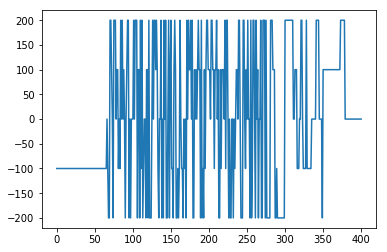

In [17]:
plt.plot(b)

In [18]:
p1.trade_book.book

{0: [150.0, 0, 0.0, 0],
 1: [183.16, 0, 0.0, 0],
 2: [184.27, 0, 0.0, 0],
 3: [144.4, 100, -14460.0, 100],
 4: [148.95, 0, 414.9999999999982, -100],
 5: [116.37, 0, 414.9999999999982, 0],
 6: [100.49, 200, -19743.0, 200],
 7: [113.49, 100, -8414.0, -100],
 8: [152.43, 200, -23677.0, 100],
 9: [196.76, 0, 15615.0, -200],
 10: [163.17, 200, -17078.999999999996, 200],
 11: [164.21, 200, -17078.999999999996, 0],
 12: [165.67, 0, 15995.000000000004, -200],
 13: [174.93, 0, 15995.000000000004, 0],
 14: [141.43, 0, 15995.000000000004, 0],
 15: [199.48, 0, 15995.000000000004, 0],
 16: [237.71, 200, -31606.999999999996, 200],
 17: [287.51, 300, -60378.0, 100],
 18: [213.73, 300, -60378.0, 0],
 19: [204.85, 200, -39913.0, -100],
 20: [218.68, 100, -18065.0, -100],
 21: [233.01, 0, 5216.0, -100],
 22: [204.98, 100, -15302.0, 100],
 23: [163.36, 0, 1014.0000000000018, -100],
 24: [143.01, 100, -13306.999999999998, 100],
 25: [128.3, 0, -496.99999999999636, -100],
 26: [152.3, 0, -496.9999999999963